# Background extraction

In [25]:
%matplotlib inline
from pylab import *
rcParams['figure.figsize'] = 16, 6
import numpy as np
import cv2
import ipywidgets

def preview_video(images):
    frames = np.uint8(np.linspace(0,len(images)-1,6))
    for index, frame_num in enumerate(frames):
        subplot(2,3,index+1); title(frame_num); imshow(images[frame_num]);

Let's load a video

In [22]:
import os
dir_path = '../inputs/image_sequence_1'
video_frames = [cv2.cvtColor(cv2.imread(os.path.join(dir_path,x)), cv2.COLOR_BGR2RGB) for x in os.listdir(dir_path)]

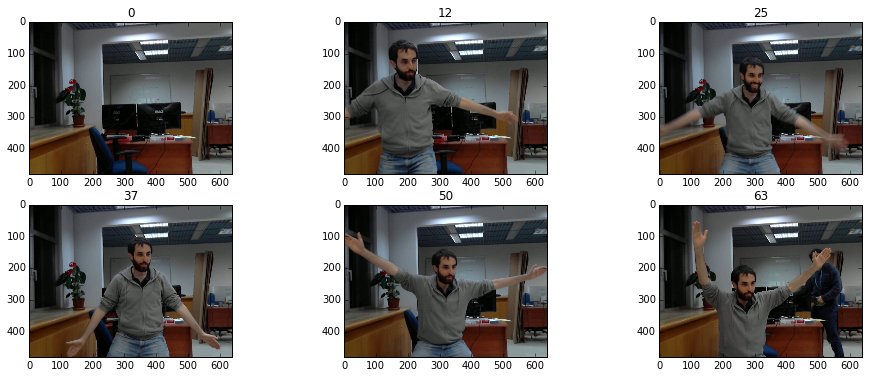

In [27]:
preview_video(video_frames)

We create the background subtractor with **cv2.BackgroundSubtractorMOG2**

In [ ]:
bs = cv2.BackgroundSubtractorMOG2(history=10, varThreshold=16, bShadowDetection=True)

Set all sorts of parameters. The minimal ratio of probabilities of background modes:

In [ ]:
bs.setDouble('backgroundRatio', 0.7) 

number of modes:

In [10]:
bs.setInt('nmixtures', 7)

threshold on the squared Mahalan. dist. to decide when a sample is close to the existing components. If it is not close to any a new component will be generated. 

In [ ]:
bs.setDouble('varThresholdGen', 9.)
    

this is related to the number of samples needed to accept that a component actually exists. The default is CT=0.05 of all the samples:

In [ ]:
bs.setDouble('fCT', 0)

Finally we feeds the images one by one into the MOG object

In [ ]:
fg_frames = []
for i in range(len(video_frames)):
    fg = bs.apply(video_frames[i], learningRate=0.01) # feed frames to background subtractor
    fg_frames.append(fg)

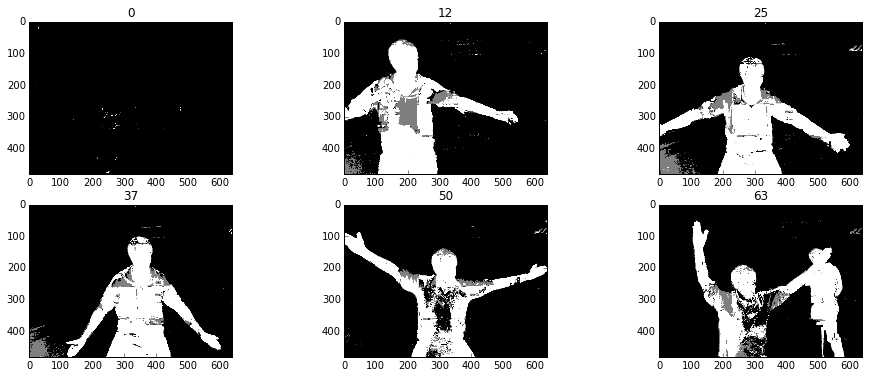

In [26]:
preview_video(fg_frames)

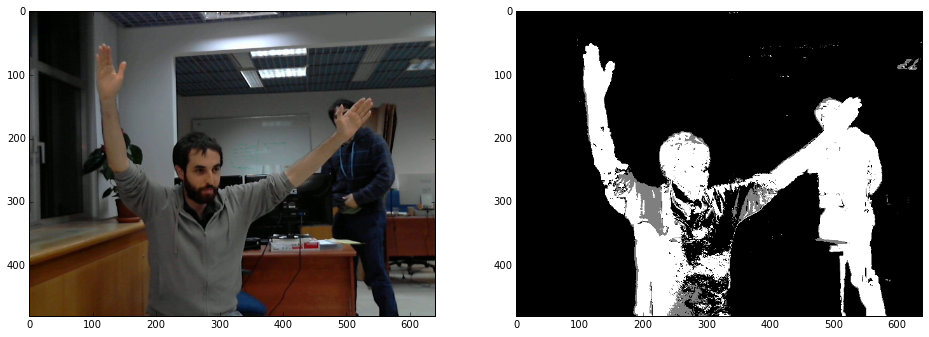

In [8]:
def show_frame(ind):
    f, (ax1, ax2) = subplots(1, 2)
    ax1.imshow(video_frames[ind])
    ax2.imshow(fg_frames[ind])
    gray()
    draw()
    
ipywidgets.interact(show_frame, ind=(0,len(fg_frames)-1), continuous_update=False)

Following is the full list of parameters:

In [9]:
print bs.getParams()

['backgroundRatio', 'detectShadows', 'fCT', 'fTau', 'fVarInit', 'fVarMax', 'fVarMin', 'history', 'nShadowDetection', 'nmixtures', 'varThreshold', 'varThresholdGen']
